In [1]:
import pandas as pd
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

#### Merge 12 months of sales data into single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

print ("shape of new df:", all_months_data.shape)

all_months_data.to_csv("all_data.csv", index=False)

shape of new df: (186850, 6)


#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

##### Drop rows of NAN

In [4]:
print("NaN's before cleanup:\n", all_data.isnull().sum())

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.isnull().sum()

print("NaN's after cleanup:\n", all_data.isnull().sum())

NaN's before cleanup:
 Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
NaN's after cleanup:
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


##### Find and delete rows to cleanup

In [5]:
all_data.sort_values(by=['Order Date'], ascending=False, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
37572,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
95478,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
108534,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
93924,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
109353,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### A bunch of rows aren't populated with usable data. Delete them

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2117,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035"
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016"


#### Parse out month into new column for later analysis

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
2117,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035",12
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12


##### Add a calculated sales column

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
print("Quantity Ordered New Type: ", all_data['Quantity Ordered'].dtype)

all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float
print("Price Each New Type: ", all_data['Price Each'].dtype)

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(10)

Quantity Ordered New Type:  int64
Price Each New Type:  float64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
2117,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035",12,2.99
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001",12,2.99
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016",12,5.98
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001",12,3.84
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016",12,5.98
3905,299378,Vareebadd Phone,1,400.00,12/31/19 23:37,"876 Lincoln St, San Francisco, CA 94016",12,400.00
3547,299044,Lightning Charging Cable,1,14.95,12/31/19 23:36,"946 South St, Atlanta, GA 30301",12,14.95
9037,304282,Google Phone,1,600.00,12/31/19 23:35,"524 4th St, New York City, NY 10001",12,600.00
4974,300394,Lightning Charging Cable,1,14.95,12/31/19 23:27,"634 Highland St, Atlanta, GA 30301",12,14.95
14357,309366,Wired Headphones,1,11.99,12/31/19 23:25,"328 Washington St, Portland, OR 97035",12,11.99


##### Question 1: What was the best month for sales? How much was earned that month?

In [9]:
results = all_data.groupby('Month').sum()

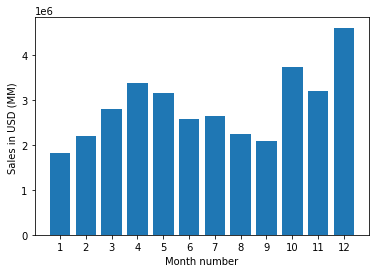

In [10]:
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (MM) ')
plt.xlabel('Month number')
plt.show()

#### What US city had the highest number of sales?

In [11]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")



In [12]:
results=all_data.groupby('City').sum()
#results.sort_values(by=['Sales'], ascending=False, inplace=True)
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


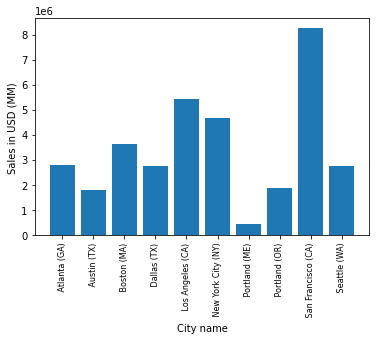

In [13]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD (MM) ')
plt.xlabel('City name')
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute



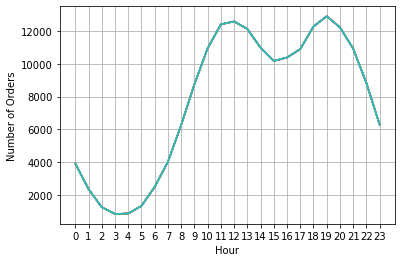

In [15]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#### Question 4: What products are most often sold together?

In [16]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()


/var/folders/w2/z8_f6m_n3bqg6w1r8thbxmt80000gn/T/ipykernel_58296/413795858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [17]:
# Reference: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('Lightning Charging Cable', 'iPhone') 526
('USB-C Charging Cable', 'Google Phone') 506
('Google Phone', 'USB-C Charging Cable') 493
('iPhone', 'Lightning Charging Cable') 489
('Wired Headphones', 'iPhone') 234
('iPhone', 'Wired Headphones') 228
('Wired Headphones', 'Google Phone') 225
('Vareebadd Phone', 'USB-C Charging Cable') 199
('Google Phone', 'Wired Headphones') 198
('Apple Airpods Headphones', 'iPhone') 188


#### Question 5: What product sold the most? Why do you think it sold the most?


<function matplotlib.pyplot.show(close=None, block=None)>

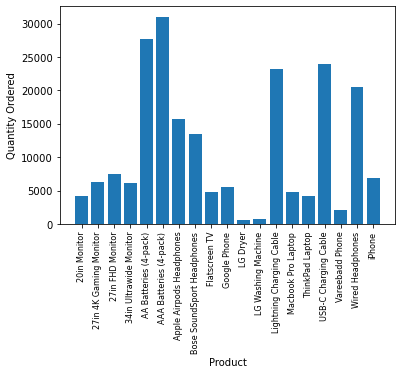

In [18]:
product_group = all_data.groupby('Product')
product_group.sum()

products = [product for product, df in product_group]

plt.bar(products, product_group.sum()['Quantity Ordered'])
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show

/var/folders/w2/z8_f6m_n3bqg6w1r8thbxmt80000gn/T/ipykernel_58296/44140681.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


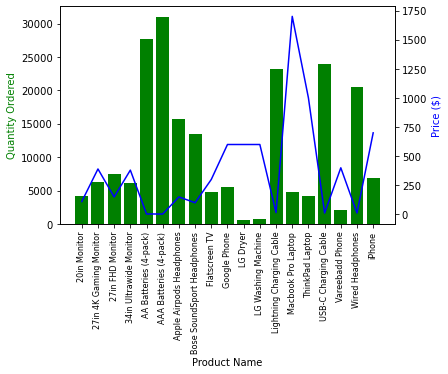

In [19]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group.sum()['Quantity Ordered'], color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

